In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   # FutureWarning 제거

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

- 정규분포 ( 가우스 정규분포 )
  - 평균이 0이고, 분산이 1인 정규분포를 표준정규분포라고 한다.

In [3]:
# 정규분포 객체 생성
mu = 0
std = 1
rv = stats.norm(mu, std)

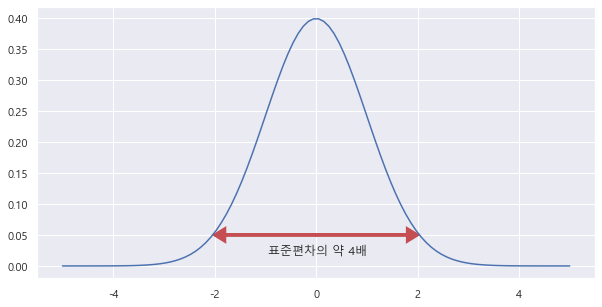

In [32]:
# 확률밀도함수 ( PDF )
xx = np.linspace(-5, 5, 100)

plt.figure(figsize=(10, 5))
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw=3, color='r',
          head_width = 0.02, head_length = 0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw=3, color='r',
          head_width = 0.02, head_length = 0.2, length_includes_head=True)
plt.text(-0.95, 0.02, '표준편차의 약 4배')
# 첫 두 param은 시작지점의 (x,y), 3th param은 도착지점의 x, 
# 4th param은 arrow의 bias,  lw = 굵기
plt.show()

In [33]:
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

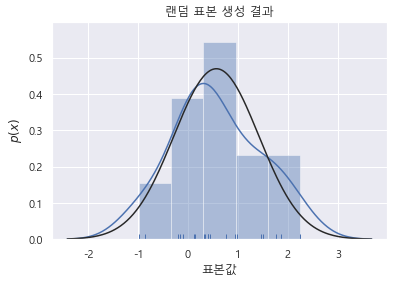

In [34]:
sns.distplot(x, rug=True, kde=True, fit=stats.norm)
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('$p(x)$')
plt.show()

- Q-Q 플롯
  - Quantile - Quantile 플롯은 표본 데이터의 분포와 정규분포의 분포 형태를 비교하여 표본 데이터가 정규분포를 따르는지 검사하는 간단한 시각적 도구
  - 동일 분위수에 해당하는 정상 분포의 값과 주어진 데이터값을 한 쌍으로 만들어 그린 스캐터 플롯 ( 산점도 )
  1. 표본 데이터를 정렬
  2. 표본 데이터가 전체 데이터의 몇 %에 해당하는지 위칫값을 구함 ( 특정 순위가 나타날 가능성이 높은 값을 뜻하는 순서통계량 이용 )
  3. 각 표본 데이터의 위칫값이 정규분포의 누적확률함수 값이 되는 표준정규분포의 표본값을 구함. 즉 확률값에 대한 누적확률함수의 역함수를 구함

- 중심극한정리
  - 여러 확률변수의 합이 정규분포와 비슷한 분포를 이루는 현상
  - N개의 임의의 분포로부터 얻는 표본의 평균은 N이 증가할수록 기댓값이 $\mu$, 분산이 $\frac{\sigma^2}{N}$인 정규분포로 수렴한다

- 스튜던트 t 분포
  - 정규분포와 유사하지만, 양 끝단의 비중이 정규분포에 비해 큰 분포
  - 극단적인 현상이 더 자주 발생한다고 하여, Fat tail 이라고 함
  - 팻 테일을 보이는 데이터 모형에 적합한 분포
  - 모수로 자유도(degree of freedom, $\nu$)을 추가적으로 가짐
  

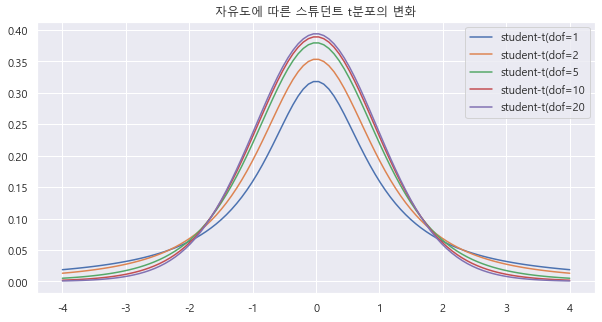

In [36]:
# 스튜던트 t분포 객체 생성
xx = np.linspace(-4, 4, 100)
t_dist1 = stats.t(df=1)
t_dist2 = stats.t(df=2)
t_dist5 = stats.t(df=5)
t_dist10 = stats.t(df=10)
t_dist20 = stats.t(df=20)

plt.figure(figsize=(10,5))
plt.plot(xx, t_dist1.pdf(xx), label=('student-t(dof=1'))
plt.plot(xx, t_dist2.pdf(xx), label=('student-t(dof=2'))
plt.plot(xx, t_dist5.pdf(xx), label=('student-t(dof=5'))
plt.plot(xx, t_dist10.pdf(xx), label=('student-t(dof=10'))
plt.plot(xx, t_dist20.pdf(xx), label=('student-t(dof=20'))
plt.title('자유도에 따른 스튜던트 t분포의 변화')
plt.legend()
plt.show()

- t통계량
  - 정규화한 통계량은 항상 정규분포가 된다
  - 하지만 통계량을 구하려면 확률분포의 정확한 표준편차를 알고 있어야하는데,
  - 모집단에 대해 모두 알 수는 없으므로, 표본에서 측정한 표본표준편차를 정규화하여 사용
  - 정규분포로부터 얻은 N개의 표본의 평균을 표본표준편차로 정규화한 값을 t통계량이라고 한다.
  - t통계량은 자유도가 N-1인 스튜던트 t분포를 이룬다